# Exploratory Data Analysis (EDA) on New York Airbnb Listings

# importing dependencies

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# data source

In [ ]:
https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data/code

In [67]:
df=pd.read_csv("AB_NYC_2019.csv")

In [68]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [69]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [70]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [71]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [72]:
df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [73]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

# explanation about each column

In [ ]:
1)id  : Unique identifier for each Airbnb listing in New York. 
It's a specific identification number assigned to each property listed on the platform.

2) name  : The title or name given to the property listed on Airbnb. It provides a brief description or title of the listing.

3)'host_id': A unique identifier for the host who owns or manages the listed property in New York.
    
4)'host_name': The name of the host associated with the listed property.

5)'neighbourhood_group': Represents the broader geographical area or borough(district) within New York City where the property is located (e.g., Manhattan, Brooklyn, Queens, Bronx, Staten Island).
    
6)'neighbourhood': Specifies the specific neighborhood or locality within the borough(district) where the property is situated.

7)'latitude' and 'longitude': Geographic coordinates (latitude and longitude) of the property, pinpointing its exact location on the Earth's surface within New York City.

8)'room_type': Indicates the type of accommodation being offered, such as 'Entire home/apartment,' 'Private room,' or 'Shared room.'

9)'price': The cost of renting the property per night listed in the dataset.

10)'minimum_nights': Represents the minimum number of nights required for booking the property as set by the host.

11)'number_of_reviews': Total count of reviews received for the property from guests who have stayed there.
    
12)last_review': Indicates the date of the last review received for the property.

13)'reviews_per_month': Average number of reviews received per month for the property.

14) 'calculated_host_listings_count': The count of listings or properties managed by the same host within New York City.
    
15)'availability_365': Represents the number of days the property is available for booking in a year (out of 365 days), indicating its availability throughout the year.

In [74]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [75]:
df['last_review']=pd.to_datetime(df['last_review'],infer_datetime_format=True)
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [76]:
df.shape

(48895, 16)

# some statistics about data

In [77]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [78]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# handling null values

In [79]:
df['name'].fillna('No Name', inplace=True)
df['host_name'].fillna('No Host Name', inplace=True)


In [80]:
df.dropna(subset=['last_review'], inplace=True)

In [81]:
mean_reviews_per_month = df['reviews_per_month'].mean()
df['reviews_per_month'].fillna(mean_reviews_per_month, inplace=True)

In [82]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [83]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [84]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.0,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.0,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.0,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.0,1,40
48852,36455809,"Cozy Private Room in Bushwick, Brooklyn",74162901,Christine,Brooklyn,Bushwick,40.69805,-73.92801,Private room,30,1,1,2019-07-08,1.0,1,1


In [85]:
# Calculate the average price of listings
average_price = df['price'].mean()
print(f"The average price of listings in New York is: ${average_price:.2f}")


The average price of listings in New York is: $142.32


In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Entire home/apt    20332
Private room       17665
Shared room          846
Name: room_type, dtype: int64


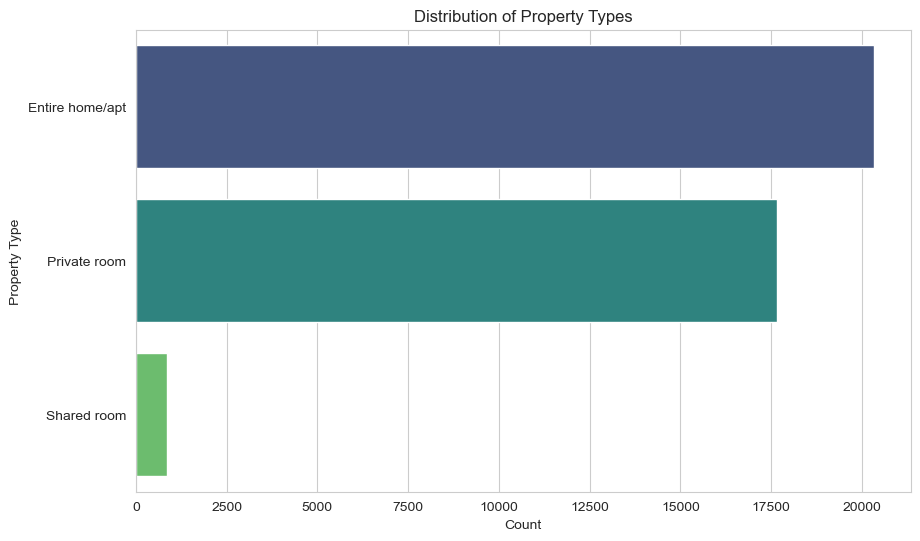

In [88]:
# Visualize the distribution of property types
plt.figure(figsize=(10, 6))
property_type_count = df['room_type'].value_counts()
print(property_type_count)
sns.countplot(y='room_type', data=df, order=property_type_count.index, palette='viridis')
plt.title('Distribution of Property Types')
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.show()


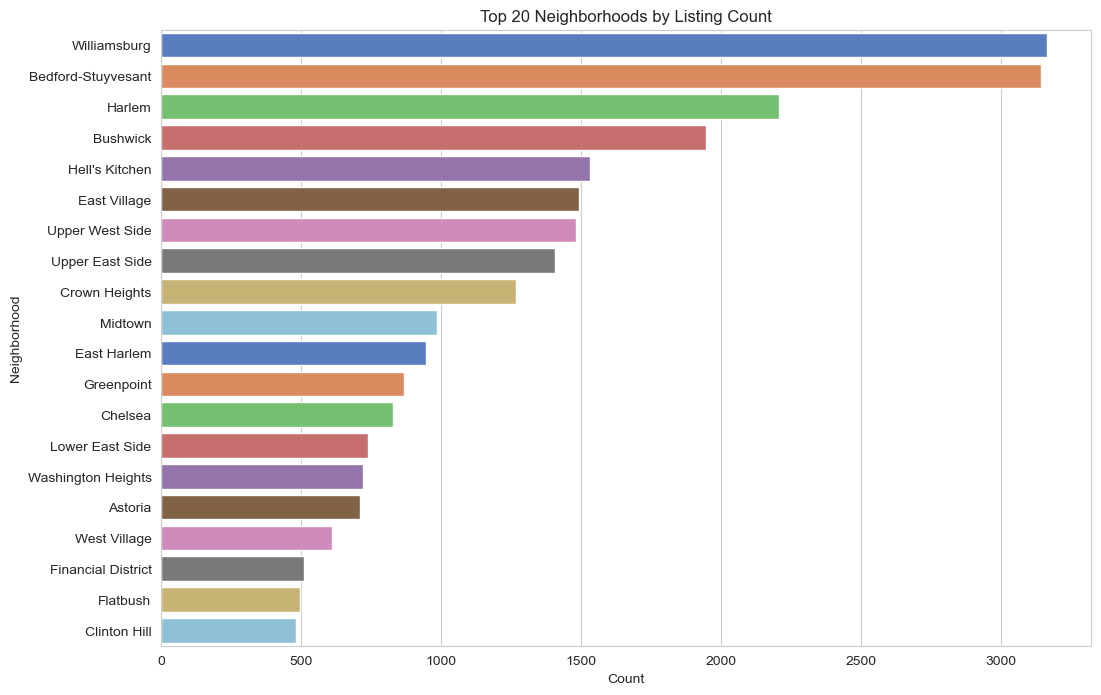

In [89]:
# Visualize the distribution of neighborhoods
plt.figure(figsize=(12, 8))
neighborhood_count = df['neighbourhood'].value_counts().head(20)  # considering top 20 neighborhoods
sns.barplot(x=neighborhood_count.values, y=neighborhood_count.index, palette='muted')
plt.title('Top 20 Neighborhoods by Listing Count')
plt.xlabel('Count')
plt.ylabel('Neighborhood')
plt.show()


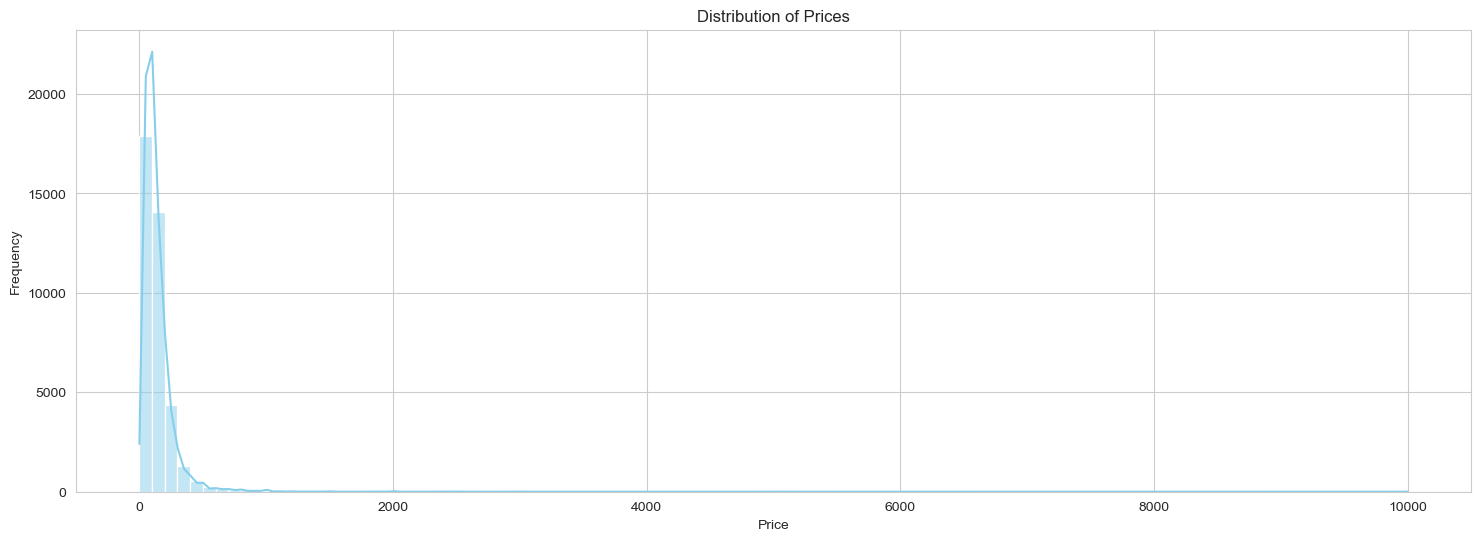

In [93]:
# Visualizing price distribution
plt.figure(figsize=(18, 6))
sns.histplot(df['price'], bins=100, kde=True, color='skyblue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


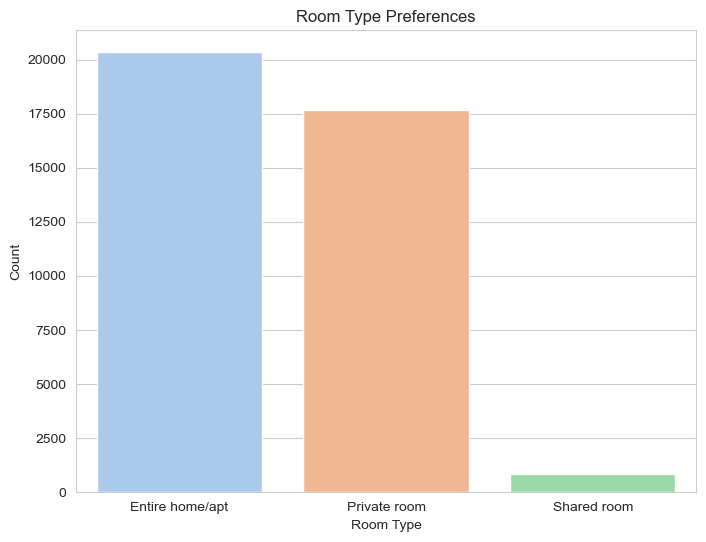

In [59]:
# Plotting room type preferences
plt.figure(figsize=(8, 6))
room_type_counts = df['room_type'].value_counts()
#print(room_type_counts)
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='pastel')
plt.title('Room Type Preferences')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()


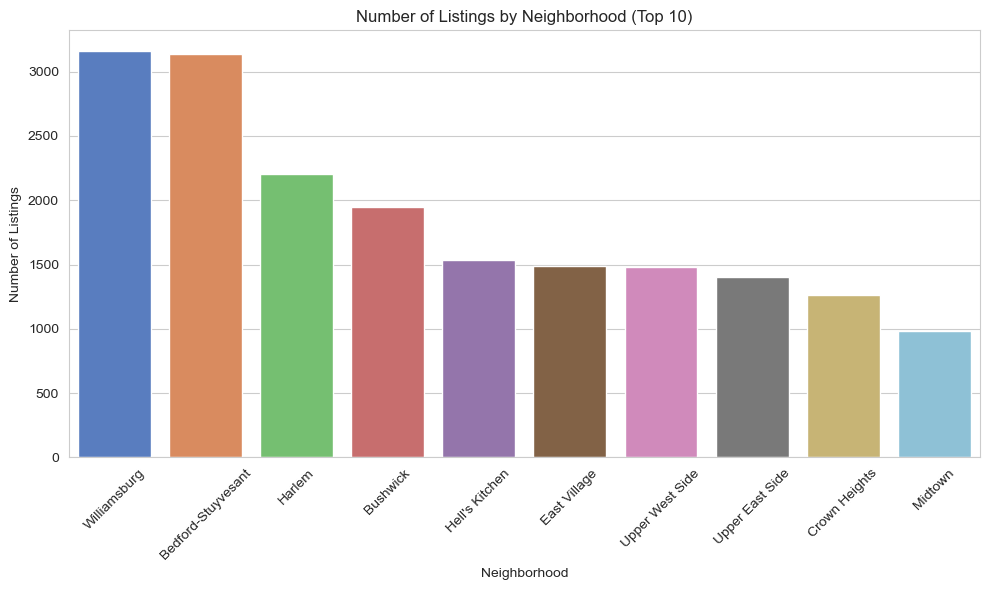

In [91]:
# Plotting the number of listings by neighborhood (considering top 10 neighborhoods)
plt.figure(figsize=(10, 6))
top_neighborhoods = df['neighbourhood'].value_counts().head(10)
sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette='muted')
plt.title('Number of Listings by Neighborhood (Top 10)')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [103]:
!pip install folium


In [22]:
import folium

# Create a map centered around a specific location
map_airbnb = folium.Map(location=[40.7128, -74.0060], zoom_start=100)  # New York City coordinates

# Iterate through your dataset and add markers for each Airbnb listing
for index, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['neighbourhood']).add_to(map_airbnb)

# Display the map
map_airbnb.save('airbnb_distribution_map.html')  # Save map to an HTML file


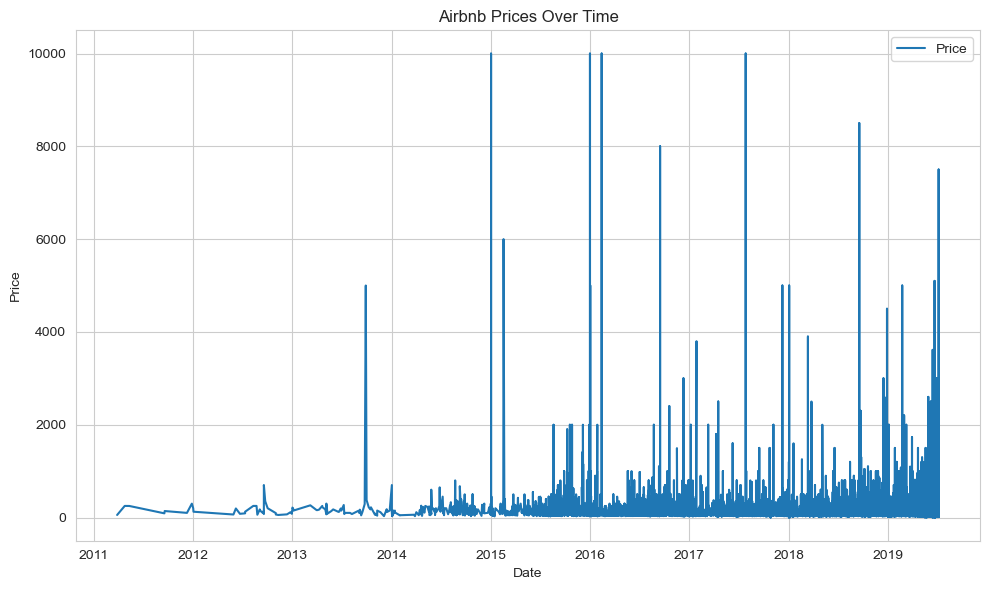

In [92]:
import seaborn as sns



# Sort values by 'last_review' to arrange data chronologically
df.sort_values('last_review', inplace=True)


# Basic preprocessing
# Set 'last_review' as the index
df.set_index('last_review', inplace=True)

# Plotting time series for 'price' over time
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

plt.plot(df.index, df['price'], label='Price')
plt.title('Airbnb Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


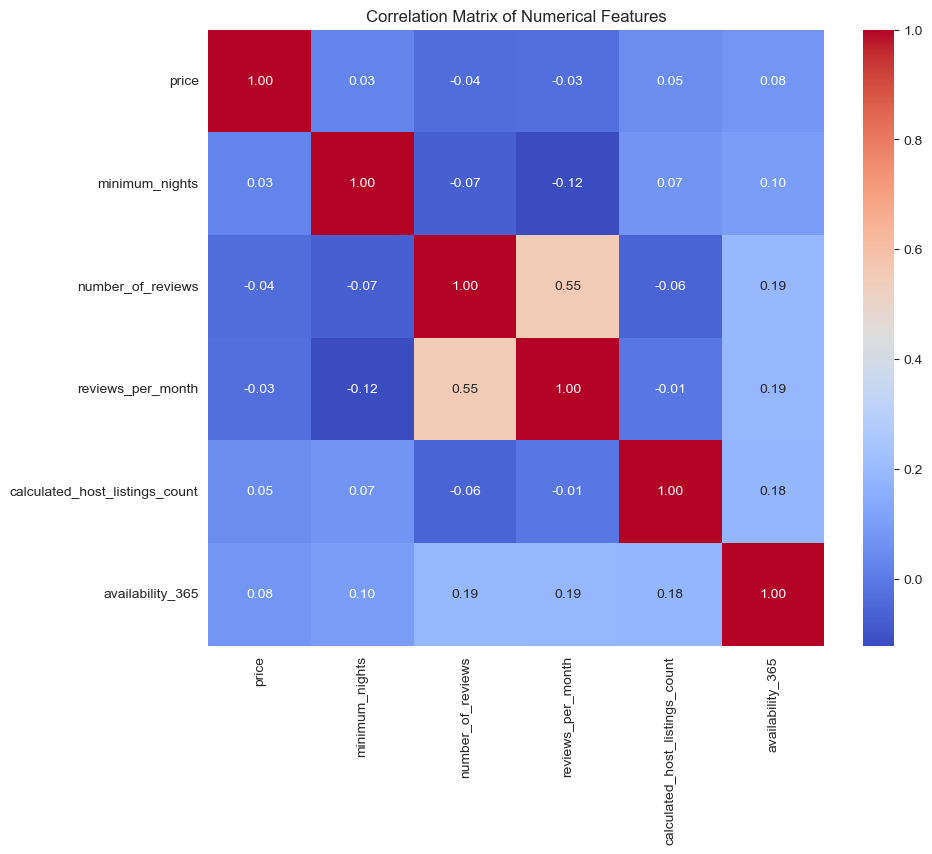

In [95]:

numerical_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                     'calculated_host_listings_count', 'availability_365']

# Creating a new DataFrame with only the numerical columns
numerical_df = df[numerical_columns]

# Calculating the correlation matrix
correlation_matrix = numerical_df.corr()

# Plotting the correlation matrix as a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
